In [1]:
import pandas as pd
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,kurtosis

import os

In [2]:
def get_daily_returns(returns): return [(np.array(returns)+1)**(1/5)-1]     

In [3]:
spy = pd.read_csv('data/spy_data.csv', low_memory = False )
spy['Date'] = pd.to_datetime(spy['Date'])
spy = spy.set_index('Date')
spy.head()  

,SPY
Date,
2007-03-01,-0.008727
2007-03-08,-0.009387
2007-03-15,0.016148
2007-03-22,-0.003001
2007-03-29,0.013186


In [4]:
spy_PNL = spy.cumsum()   

In [5]:

#df40 = pd.read_csv('data/lam(0.5)window(180).csv', low_memory = False )
#df90 = pd.read_csv('data/lam(0.5)window(90).csv', low_memory = False )
#df180 = pd.read_csv('data/lam(0.5)window(40).csv', low_memory = False )  

df40 = pd.read_csv('data/lam(0.7)window(40).csv', low_memory= False)
df90 = pd.read_csv('data/lam(0.7)window(90).csv', low_memory=False)
df180 = pd.read_csv('data/lam(0.7)window(180).csv', low_memory=False)

#df40 = pd.read_csv('data/lam(0.3)window(40).csv', low_memory=False)
#df90 = pd.read_csv('data/lam(0.3)window(90).csv', low_memory=False)
#df180 = pd.read_csv('data/lam(0.3)window(180).csv', low_memory=False)


In [6]:
df40['Date'] = pd.to_datetime(df40['Date'])
df90['Date'] = pd.to_datetime(df90['Date'])
df180['Date'] = pd.to_datetime(df180['Date']) 

df40 = df40.set_index('Date')
df90 = df90.set_index('Date')
df180 = df180.set_index('Date')

In [7]:
df40['Returns_1_pct'] = list(get_daily_returns(df40['Returns_1'])[0]*100)
df90['Returns_1_pct'] = list(get_daily_returns(df90['Returns_1'])[0]*100)
df180['Returns_1_pct'] = list(get_daily_returns(df180['Returns_1'])[0]*100) 

df40['Returns_2_pct'] = list(get_daily_returns(df40['Returns_2'])[0]*100)
df90['Returns_2_pct'] = list(get_daily_returns(df90['Returns_2'])[0]*100)
df180['Returns_2_pct'] = list(get_daily_returns(df180['Returns_2'])[0]*100) 

In [8]:
df40.head(2)     

,Returns_1,Returns_2,Returns_1_pct,Returns_2_pct
Date,,,,
2007-03-01,-0.000191,-0.046030,-0.003825,-0.938032
2007-03-08,0.000750,-0.029173,0.014990,-0.590384


In [9]:
PNL40 = df40.cumsum()
PNL90 = df90.cumsum() 
PNL180 = df180.cumsum() 

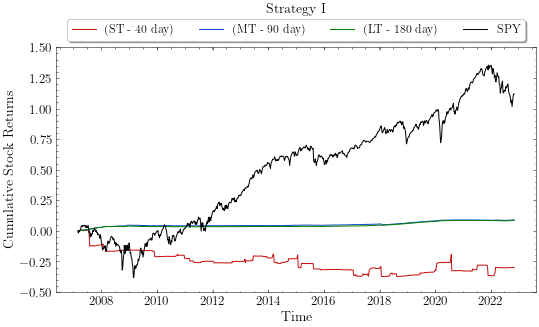

In [10]:

#with plt.style.context('seaborn-whitegrid'):
with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(8 , 4.75))
    
    plt.plot(PNL40[['Returns_1']], label = '(ST - 40 day)', color = '#c90e0e')  # red
    plt.plot(PNL90[['Returns_1']], label = '(MT - 90 day)', color = '#0e49c9')  # blue
    plt.plot(PNL180[['Returns_1']], label = '(LT - 180 day)', color = 'green')   # green
    plt.plot(spy_PNL[['SPY']], label ='SPY', color = '#000308',  linewidth = 1.0)

    plt.ylabel("Cumulative Stock Returns", fontsize = 14) 
    plt.xlabel("Time", fontsize = 14)
    plt.title("Strategy I \n \n",  fontsize = 14)
    
    plt.yticks(fontsize = 13) 
    plt.xticks(fontsize = 13) 
    plt.legend(bbox_to_anchor=(.01, 1.14), loc='upper left', ncol = 4, fancybox = True, shadow = True, frameon  = True, fontsize = 12)
    plt.ylim(-.5 , 1.5)
    
    
    plt.tight_layout()       
    plt.savefig('plots/Compare_Trends_I_lambda_7.jpg', dpi = 550 ) 
    
    plt.show() 
    

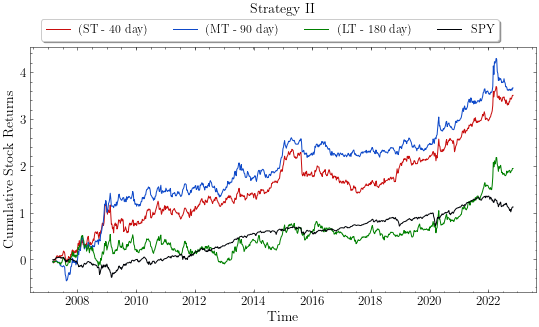

In [11]:

#with plt.style.context('seaborn-whitegrid'):
with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(8 , 4.75))
    
    plt.plot(PNL40[['Returns_2']], label = '(ST - 40 day)', color = '#c90e0e')  # red
    plt.plot(PNL90[['Returns_2']], label = '(MT - 90 day)', color = '#0e49c9')  # blue
    plt.plot(PNL180[['Returns_2']], label = '(LT - 180 day)', color = 'green')   # green
    plt.plot(spy_PNL[['SPY']], label ='SPY', color = '#000308',  linewidth = 1.0)

    plt.ylabel("Cumulative Stock Returns", fontsize = 14) 
    plt.xlabel("Time", fontsize = 14)
    plt.title("Strategy II \n \n",  fontsize = 14)
    
    plt.yticks(fontsize = 13) 
    plt.xticks(fontsize = 13) 
    plt.legend(bbox_to_anchor=(.01, 1.14), loc='upper left', ncol = 4, fancybox = True, shadow = True, frameon  = True, fontsize = 12)
    #plt.ylim(-.9 , .7)
    
    plt.tight_layout()       
    plt.savefig('plots/Compare_Trends_II_lambda_7.jpg', dpi = 550 ) 
    
    plt.show() 

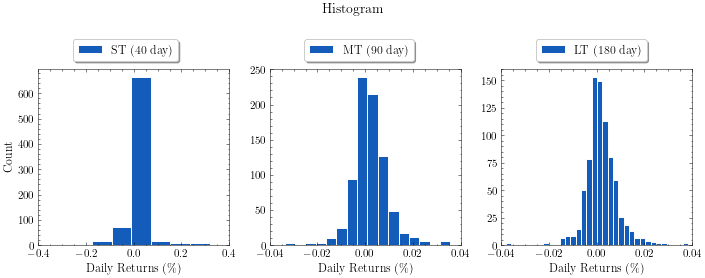

In [12]:

# Strategy 1

with plt.style.context('science'):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 4))

    # ST 40 day  
    for label in (ax1.get_xticklabels() + ax1.get_yticklabels()): label.set_fontsize(11)
    ax1.hist(df40['Returns_1_pct'], bins = 45  , color = '#145cba', edgecolor = "#fafbfc", label = 'ST (40 day)')
    ax1.set_ylabel('Count' , fontsize = 12); ax1.set_xlabel('Daily Returns (\%)', fontsize = 12)
    ax1.set_xlim(-.4, .4)
    ax1.legend(bbox_to_anchor=(.15, 1.2), loc='upper left', ncol = 3, fancybox = True, shadow = True, frameon  = True, fontsize = 12)

    # MT 90 day  
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()): label.set_fontsize(11)
    ax2.hist(df90['Returns_1_pct'], bins = 45  , color = '#145cba', edgecolor = "#fafbfc", label = 'MT (90 day)')
    ax2.set_ylabel('' , fontsize = 12); ax2.set_xlabel('Daily Returns (\%)', fontsize = 12)
    ax2.set_xlim(-.04, .04)
    ax2.legend(bbox_to_anchor=(.15, 1.2), loc='upper left', ncol = 3, fancybox = True, shadow = True, frameon  = True, fontsize = 12)

    # LT 180 day  
    for label in (ax3.get_xticklabels() + ax3.get_yticklabels()): label.set_fontsize(11)
    ax3.hist(df180['Returns_1_pct'], bins = 45  , color = '#145cba', edgecolor = "#fafbfc", label = 'LT (180 day)')
    ax3.set_ylabel('' , fontsize = 12); ax3.set_xlabel('Daily Returns (\%)', fontsize = 12)
    ax3.set_xlim(-.04, .04)
    ax3.legend(bbox_to_anchor=(.15, 1.2), loc='upper left', ncol = 3, fancybox = True, shadow = True, frameon  = True, fontsize = 12)
    
    fig.suptitle('Histogram', fontsize = 14)
    plt.tight_layout() 
    #plt.savefig('plots/hist_I_lambda_7.jpg', dpi = 550)
    plt.show()



In [13]:
def summary(df, col_name):
    from scipy.stats import skew,kurtosis
    table = pd.DataFrame({ 'Mean': np.mean(df[[col_name]]) , 
                           'STD': np.std(df[[col_name]] ) ,  
                           'SKEW': skew(df[[col_name]]) ,  
                           'KURT': kurtosis(df[[col_name]]) })

    return(table)

In [14]:
summary(df40, 'Returns_1_pct') 

,Mean,STD,SKEW,KURT
Returns_1_pct,-0.008107,0.201654,-6.78312,77.957127


In [15]:
summary(df90, 'Returns_1_pct') 

,Mean,STD,SKEW,KURT
Returns_1_pct,0.002176,0.010073,-2.589913,49.715804


In [16]:
summary(df180, 'Returns_1_pct')  

,Mean,STD,SKEW,KURT
Returns_1_pct,0.002072,0.007964,0.928839,9.276048


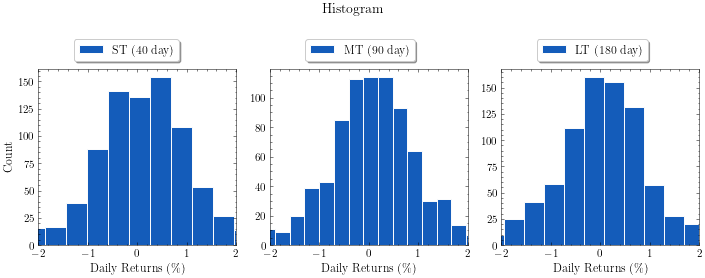

In [17]:

with plt.style.context('science'):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 4))

    # ST 40 day  
    for label in (ax1.get_xticklabels() + ax1.get_yticklabels()): label.set_fontsize(11)
    ax1.hist(df40['Returns_2_pct'], bins = 25  , color = '#145cba', edgecolor = "#fafbfc", label = 'ST (40 day)')
    ax1.set_ylabel('Count' , fontsize = 12); ax1.set_xlabel('Daily Returns (\%)', fontsize = 12)
    ax1.set_xlim(-2, 2.0)
    ax1.legend(bbox_to_anchor=(.15, 1.2), loc='upper left', ncol = 3, fancybox = True, shadow = True, frameon  = True, fontsize = 12)

    # MT 90 day  
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()): label.set_fontsize(11)
    ax2.hist(df90['Returns_2_pct'], bins = 45  , color = '#145cba', edgecolor = "#fafbfc", label = 'MT (90 day)')
    ax2.set_ylabel('' , fontsize = 12); ax2.set_xlabel('Daily Returns (\%)', fontsize = 12)
    ax2.set_xlim(-2, 2)
    ax2.legend(bbox_to_anchor=(.15, 1.2), loc='upper left', ncol = 3, fancybox = True, shadow = True, frameon  = True, fontsize = 12)


    # LT 180 day  
    for label in (ax3.get_xticklabels() + ax3.get_yticklabels()): label.set_fontsize(11)
    ax3.hist(df180['Returns_2_pct'], bins = 25  , color = '#145cba', edgecolor = "#fafbfc", label = 'LT (180 day)')
    ax3.set_ylabel('' , fontsize = 12); ax3.set_xlabel('Daily Returns (\%)', fontsize = 12)
    ax3.set_xlim(-2, 2)
    ax3.legend(bbox_to_anchor=(.15, 1.2), loc='upper left', ncol = 3, fancybox = True, shadow = True, frameon  = True, fontsize = 12)
    
    fig.suptitle('Histogram', fontsize = 14)
    plt.tight_layout()
    #plt.savefig('plots/hist_II_lambda_7.jpg', dpi = 550)
    plt.show()

In [18]:
summary(df40, 'Returns_2_pct') 

,Mean,STD,SKEW,KURT
Returns_2_pct,0.063174,1.0588,-0.665888,3.752661


In [19]:
summary(df90, 'Returns_2_pct')  

,Mean,STD,SKEW,KURT
Returns_2_pct,0.06697,1.056941,-0.111833,6.207317


In [20]:
summary(df180, 'Returns_2_pct')  

,Mean,STD,SKEW,KURT
Returns_2_pct,0.029028,0.959443,-0.243084,2.913228


---

#### Summary Table



In [21]:
from scipy.stats import skew, kurtosis, norm

sample_returns = [0.02,0.01,-0.04,0.06,-0.01,0.02,0,0,-0.02,0.01,-0.02,0,0,-0.01,0.01,-0.026]

def arithmetic_mean_returns(returns): return sum(returns)/len(returns)
def geometric_mean_returns(returns): return np.product(1+np.array(returns))**(1/len(returns))-1
#def sharpe_ratio(returns,rf): return ((1+np.mean(returns))**365-1-rf)/np.std(returns)
def sharpe_ratio(returns, rf): return( np.mean(returns) / np.std(returns) )
def skewness(returns): return skew(returns)
def stock_kurtosis(returns): return kurtosis(returns) # excess kurtosis
def min_return(returns): return np.min(returns)
def annual_volatility(returns): return np.std(returns) * (52)**0.5
def var_95(returns): return norm.ppf(0.05, np.mean(returns), np.std(returns))
def emp_var_95(returns): return np.percentile(returns, 100 * 0.05)
def emp_cvar_95(returns): return np.nanmean(returns[returns < emp_var_95(returns)])
def get_daily_returns(returns): return [(np.array(returns)+1)**(1/5)-1]



In [39]:
def create_summary(returns, window):
    rf = 0.0  
    summary_table = pd.DataFrame({
        'MEAN_RETURN':np.mean(returns),
        #'GEOMETRIC_MEAN_RETURN': geometric_mean_returns(returns),
        'SHARPE_RATIO': sharpe_ratio(returns,rf) ,
        'SKEWNESS':skewness(returns),
        'KURTOSIS':stock_kurtosis(returns),
        'MIN_RETURN':min_return(returns),
        'VOLATILITY_(ANNUAL)': annual_volatility(returns),
        'VaR_(95)': var_95(returns),
        'EMP_VaR':emp_var_95(returns),
        'EMP_cVaR':emp_cvar_95(returns)})   
    summary_table = summary_table.T
    summary_table = summary_table.reset_index()
    summary_table.columns = ['INDEX','RESULTS_'+str(window)+'_DAY']
    
    return(summary_table)

In [62]:
s1 = create_summary( df40[['Returns_1_pct']] ,'40') 
s2 = create_summary( df90[['Returns_1_pct']] , '90') 
s3 = create_summary( df180[['Returns_1_pct']], '180') 

FINAL_TABLE = pd.merge(s1, s2, how = 'inner', left_on = 'INDEX' , right_on = 'INDEX' )
FINAL_TABLE_I = pd.merge(FINAL_TABLE, s3, how='inner', left_on='INDEX', right_on='INDEX')    

In [63]:
FINAL_TABLE_I   

,INDEX,RESULTS_40_DAY,RESULTS_90_DAY,RESULTS_180_DAY
0,MEAN_RETURN,-0.008107,0.002176,0.002072
1,SHARPE_RATIO,-0.040204,0.215968,0.260195
2,SKEWNESS,-6.783120,-2.589913,0.928839
3,KURTOSIS,77.957127,49.715804,9.276048
4,MIN_RETURN,-2.805527,-0.137951,-0.040227
5,VOLATILITY_(ANNUAL),1.454145,0.072639,0.057427
6,VaR_(95),-0.339798,-0.014394,-0.011027
7,EMP_VaR,-0.078777,-0.008213,-0.007298
8,EMP_cVaR,-0.519536,-0.018728,-0.014502


In [64]:
s1 = create_summary( df40[['Returns_2_pct']] ,'40') 
s2 = create_summary( df90[['Returns_2_pct']] , '90') 
s3 = create_summary( df180[['Returns_2_pct']], '180')  

FINAL_TABLE = pd.merge(s1, s2, how = 'inner', left_on = 'INDEX' , right_on = 'INDEX' )
FINAL_TABLE_II = pd.merge(FINAL_TABLE, s3, how='inner', left_on='INDEX', right_on='INDEX')

FINAL_TABLE_II

,INDEX,RESULTS_40_DAY,RESULTS_90_DAY,RESULTS_180_DAY
0,MEAN_RETURN,0.063174,0.066970,0.029028
1,SHARPE_RATIO,0.059666,0.063362,0.030255
2,SKEWNESS,-0.665888,-0.111833,-0.243084
3,KURTOSIS,3.752661,6.207317,2.913228
4,MIN_RETURN,-5.265824,-5.745942,-4.351673
5,VOLATILITY_(ANNUAL),7.635113,7.621707,6.918645
6,VaR_(95),-1.678397,-1.671543,-1.549116
7,EMP_VaR,-1.642997,-1.505323,-1.590313
8,EMP_cVaR,-2.609752,-2.479549,-2.256706


In [65]:
FINAL_COMPARE = pd.merge(FINAL_TABLE_I[['INDEX', 'RESULTS_90_DAY']] , FINAL_TABLE_II[['INDEX', 'RESULTS_90_DAY']] , how = 'inner', left_on='INDEX', right_on='INDEX',suffixes=('_I', "_II"))
FINAL_COMPARE   

,INDEX,RESULTS_90_DAY_I,RESULTS_90_DAY_II
0,MEAN_RETURN,0.002176,0.066970
1,SHARPE_RATIO,0.215968,0.063362
2,SKEWNESS,-2.589913,-0.111833
3,KURTOSIS,49.715804,6.207317
4,MIN_RETURN,-0.137951,-5.745942
5,VOLATILITY_(ANNUAL),0.072639,7.621707
6,VaR_(95),-0.014394,-1.671543
7,EMP_VaR,-0.008213,-1.505323
8,EMP_cVaR,-0.018728,-2.479549


In [66]:
FINAL_TABLE_II = FINAL_TABLE_II[FINAL_TABLE_II['INDEX'].isin(['MEAN_RETURN','GEOMETRIC_MEAN_RETURN',  'KURTOSIS'])]
FINAL_TABLE_I = FINAL_TABLE_I[FINAL_TABLE_I['INDEX'].isin(['MEAN_RETURN','GEOMETRIC_MEAN_RETURN',  'KURTOSIS'])] 

In [67]:
results_var = 'RESULTS_90_DAY'

names = list(FINAL_TABLE_II['INDEX'].iloc[:3])

strat1 = list(FINAL_TABLE_I[results_var].iloc[:3])
strat2 = list(FINAL_TABLE_II[results_var].iloc[:3])



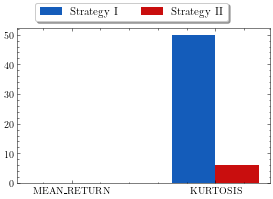

In [68]:
with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(4 , 3.0))

    # Numbers of pairs of bars you want
    N = len(names)

    # Specify the values of blue bars (height)
    blue_bar = strat1
    # Specify the values of orange bars (height)
    orange_bar = strat2

    # Position of bars on x-axis
    ind = np.arange(N)

    # Width of a bar 
    width = 0.3       

    # Plotting
    plt.bar(ind, blue_bar , width, label='Strategy I', color = '#145cba')
    plt.bar(ind + width, orange_bar, width, label='Strategy II', color = '#c90e0e')

    plt.xlabel('')
    plt.ylabel('')
    plt.title('')

    plt.xticks(ind + width / 2, names)

    plt.legend(bbox_to_anchor=(.05, 1.2), loc='upper left', ncol = 2, fancybox = True, shadow = True, frameon  = True, fontsize = 11)
    plt.tight_layout()
    plt.savefig('plots/bar_chart_return_compare.jpg', dpi = 550)
    plt.show()

